<a href="https://colab.research.google.com/github/theboogeyman81/disease_prediction_system/blob/main/backend%20/app/models/model_code/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


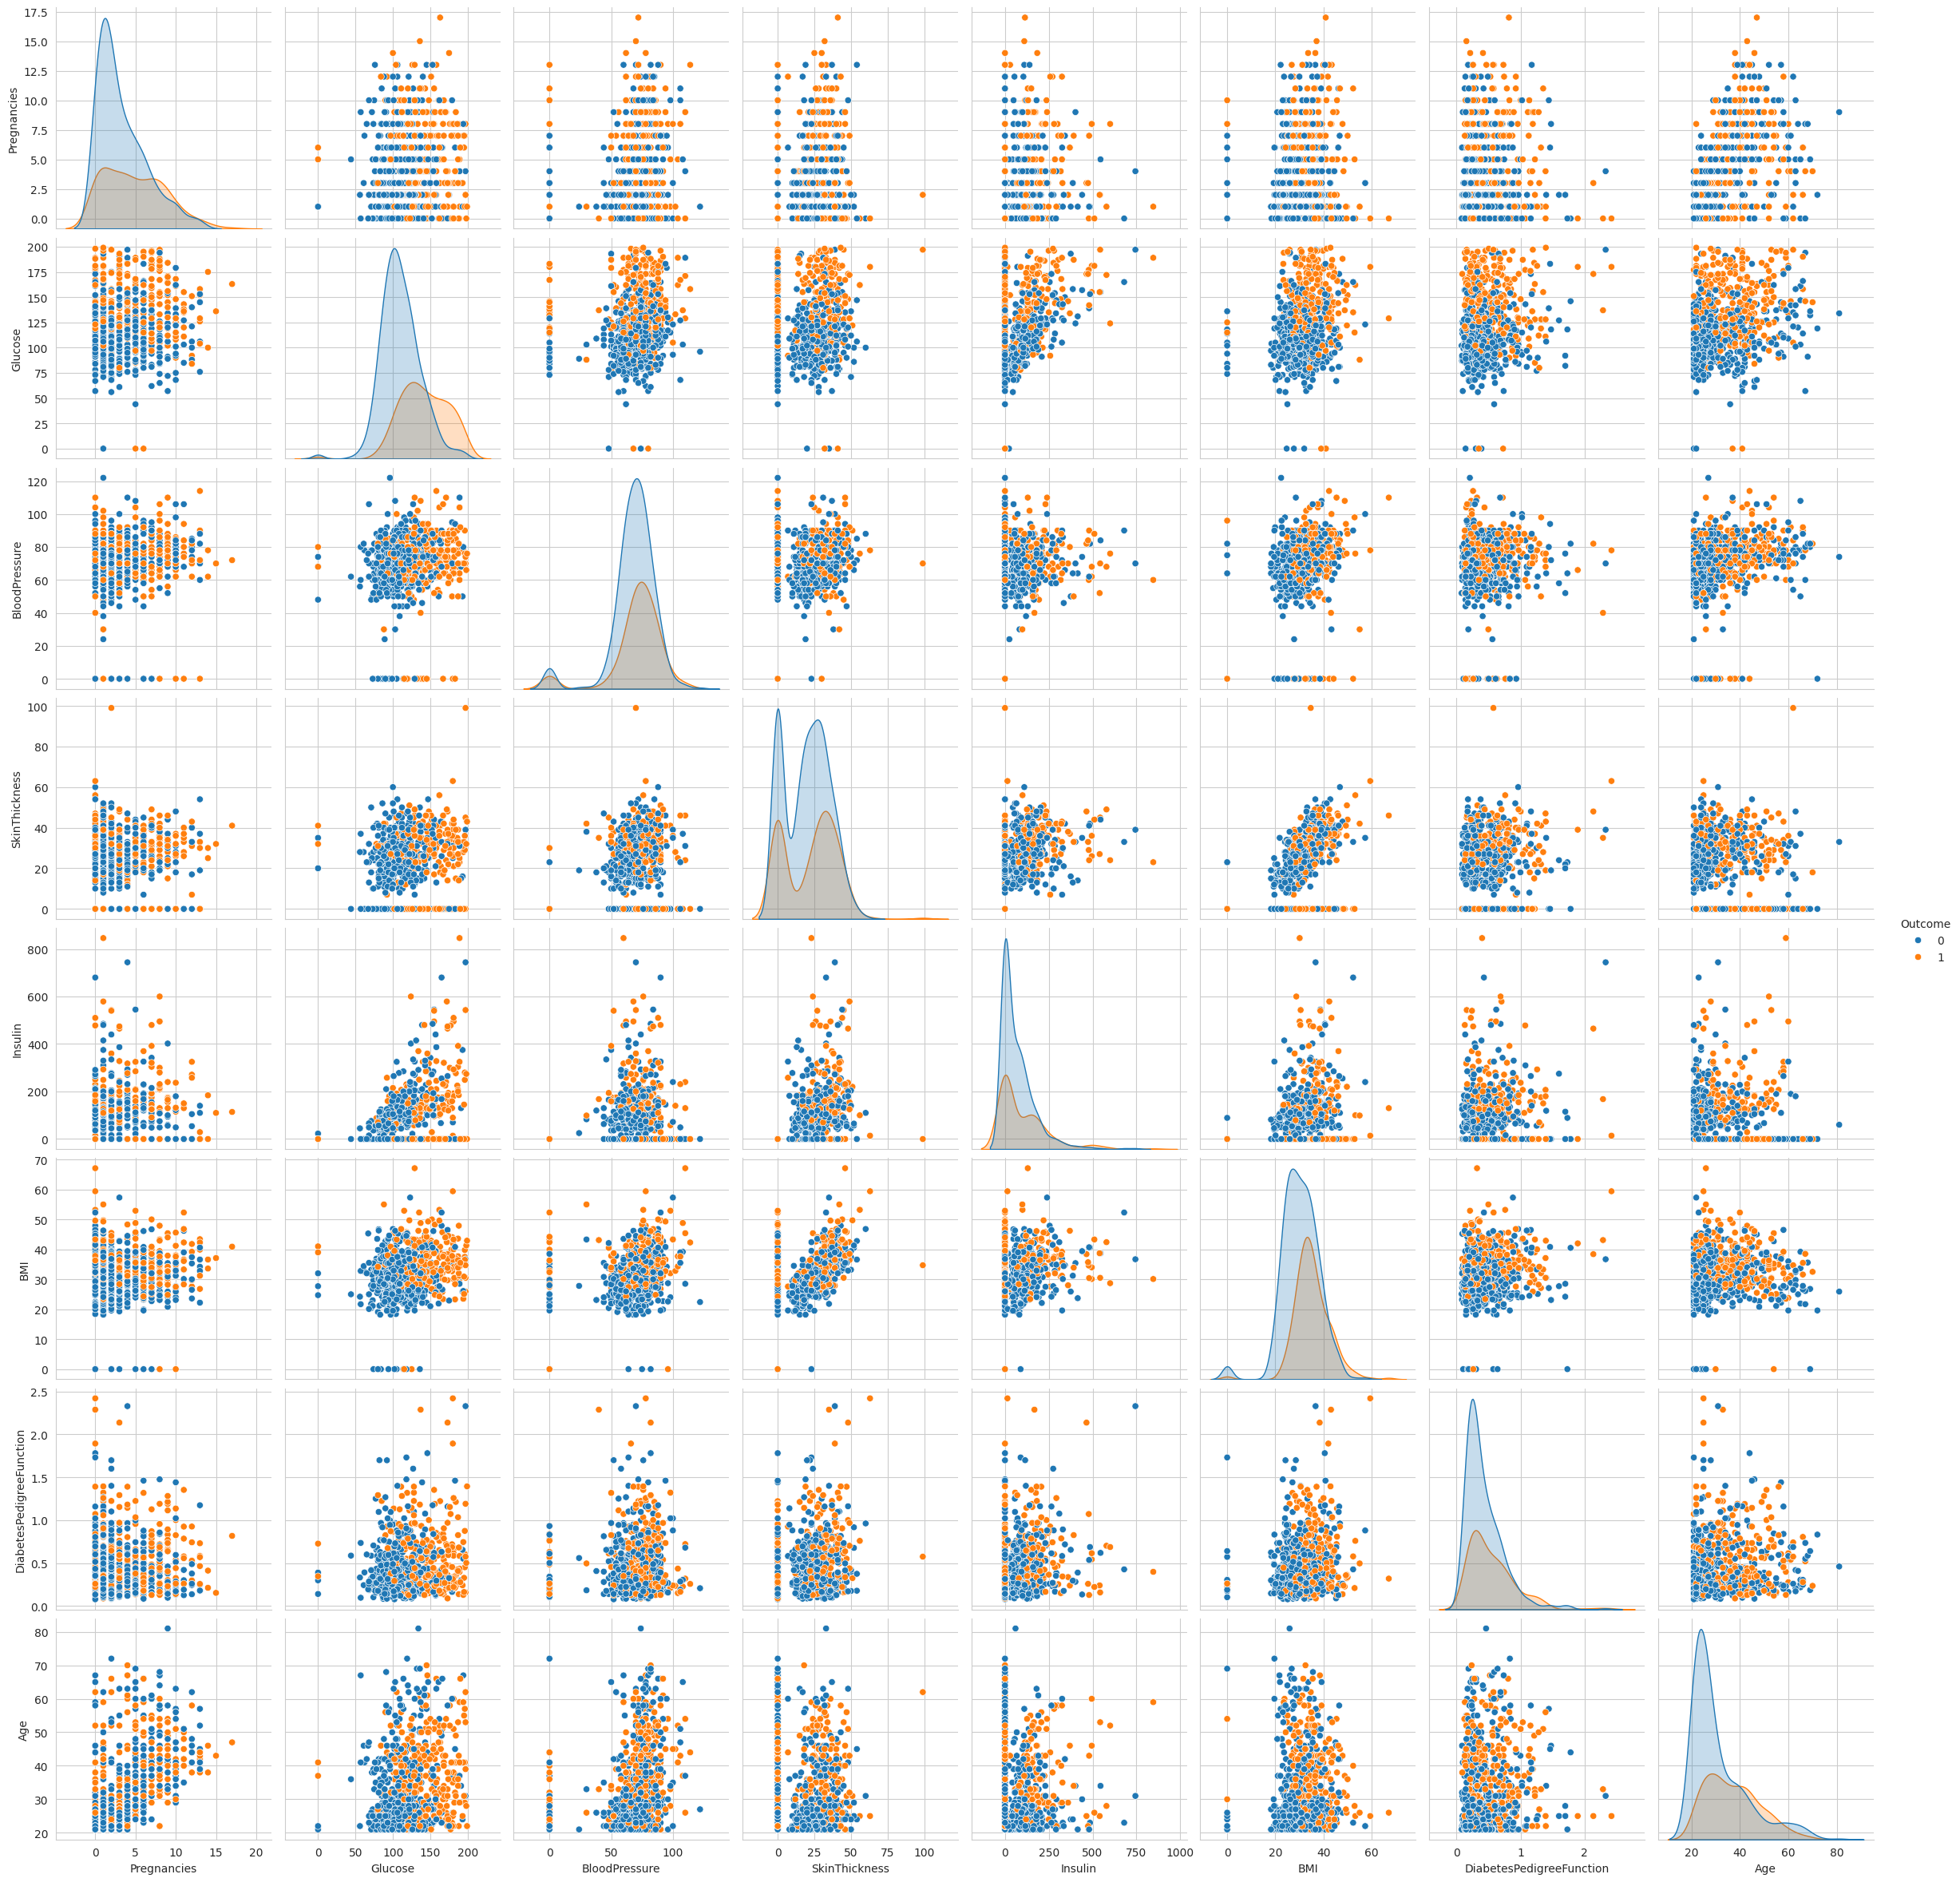

In [11]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='Outcome' , size=3)


plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:

X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [13]:

X = StandardScaler().fit_transform(X)


In [14]:
X[0:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [16]:

y_pred = logreg.predict(X_test)

In [17]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.73      0.67      0.70        52

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

